# 2.1 Color quantization k-means

For this problem you will write code to quantize a color space by applying k-means clustering to the pixels in a given input image. We will experiment with two different color spaces — RGB and HSV.

Implement each of the functions described below. After each function there is a test on the 4x6 image that will be generated within this notebook. These test are to help you verify and debug your code. However, they will not cover every possible edge case. We encourage you to write additional test or debug your code line-by-line to make sure the functions work as expected.

> Note: to pass the tests in this notebook and on Gradescope you will need to use a random seed value of `101` whenever possible. Please check the docstrings for any of the 3rd party functions to make sure you set the random seed properly.

### Exporting this notebook to a .py script

Once you are done implementing all the required functions in this notebook, you can go ahead and use the provided `notebook2script.py` script to convert this notebook into a `.py` file for submission.

The provided script will look for all the cells with the `#export` tag in the first line of the cell and only add those cells to the final script. This tag is already present for all the required cells in this notebook.

If you add any cells that you want to include in the submission, you can add the tag to the top of the cell.

The idea behind this is that students get to experiment, print and plot freely in the notebook while ensuring the submission file remains Gradescope friendly. Please avoid putting the `#export` tag on cells with `print`, `imshow`, and `plot` statements.

In [1]:
#export
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2hsv, hsv2rgb
from typing import Tuple
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.cluster.vq import kmeans2

The commands in the follwing cell will plot all images/plots in an interactive window. If you would prefer to not have interactive plots, comment out %matplotlib notebook and uncomment %matplotlib inline instead.

You can use plt.rcParams['figure.figsize'] to make all the plots in this notebook bigger or smaller.

In [4]:
%matplotlib notebook
# %matplotlib inline

# plt.rcParams['figure.figsize'] = (7, 3)

In [5]:
# set test_k = 4 to pass the tests in this notebook
test_k = 4

In [6]:
# generate a random test image (with a seed of `101`)
np.random.seed(101)
test_img = np.random.randint(0, 256, size=(4, 6, 3), dtype=np.uint8)

_, ax = plt.subplots()
ax.axis("off")
ax.imshow(test_img)

<IPython.core.display.Javascript object>

## (a) Quantize in RGB space

Given an RGB image, quantize the 3-dimensional RGB space, and map each pixel in the input image to its nearest k-means center. That is, replace the RGB value at each pixel with its nearest cluster’s average RGB value.

Use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to perfom the k-means clustering. See the documentation for details on how to use the class, and make sure you set `random_state=101`.

In [28]:
#export
def quantize_rgb(img: np.ndarray, k: int) -> np.ndarray:
    """
    Compute the k-means clusters for the input image in RGB space, and return
    an image where each pixel is replaced by the nearest cluster's average RGB
    value.

    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        k: The number of clusters to use

    Output:
        An RGB image with shape H x W x 3 and dtype "uint8"
    """
#     image = np.copy(img) 
#     [w,h,d] = np.shape(image)
#     stretch = np.reshape(img,(w*h,d))
#     kmeans = KMeans(n_clusters=k, random_state = 101)
    
#     labels = kmeans.fit_predict(stretch)

#     means = kmeans.cluster_centers_
#     image_out = means[labels].reshape(img.shape).astype(np.uint8)
    samples = img.reshape((-1, img.shape[2]))
    kMeans = KMeans(n_clusters=k, random_state=101)
    labels = kMeans.fit_predict(samples)
    centers = kMeans.cluster_centers_
    quantized_img = centers[labels].reshape(img.shape).astype(np.uint8)

#     image_out = np.zeros((w, h, d), dtype="uint8")
#     label_idx = 0
#     for i in range(w):
#         for j in range(h):
#             image_out[i][j] = means[labels[label_idx]]
#             label_idx += 1

    
    ##########################################################################
    # TODO: Perform k-means clustering and return an image where each pixel  #
    # is assigned the value of the nearest clusters RGB values.              #
    ##########################################################################

    

    ##########################################################################
    ##########################################################################
    
    return quantized_img

In [29]:
expected_quantized_img_rgb = np.array([[[159, 173,  49],
        [ 80,  34,  60],
        [159, 173,  49],
        [ 99,  60, 190],
        [ 99,  60, 190],
        [159, 173,  49]],

       [[ 80,  34,  60],
        [ 99,  60, 190],
        [209, 185, 212],
        [ 80,  34,  60],
        [ 99,  60, 190],
        [ 99,  60, 190]],

       [[ 99,  60, 190],
        [159, 173,  49],
        [159, 173,  49],
        [ 80,  34,  60],
        [ 99,  60, 190],
        [ 99,  60, 190]],

       [[209, 185, 212],
        [209, 185, 212],
        [159, 173,  49],
        [ 80,  34,  60],
        [209, 185, 212],
        [ 99,  60, 190]]], dtype=np.uint8)

quantized_img_rgb = quantize_rgb(test_img, test_k)

if np.allclose(quantized_img_rgb, expected_quantized_img_rgb):
    print("\nQuantized image computed correctly!")
else:
    print("\nQuantized image is incorrect.")
    print(f"\nexpected:\n\n{expected_quantized_img_rgb}")
    print(f"\ncomputed:\n\n{quantized_img_rgb}")


Quantized image computed correctly!


Let's take a look at the results.

<IPython.core.display.Javascript object>


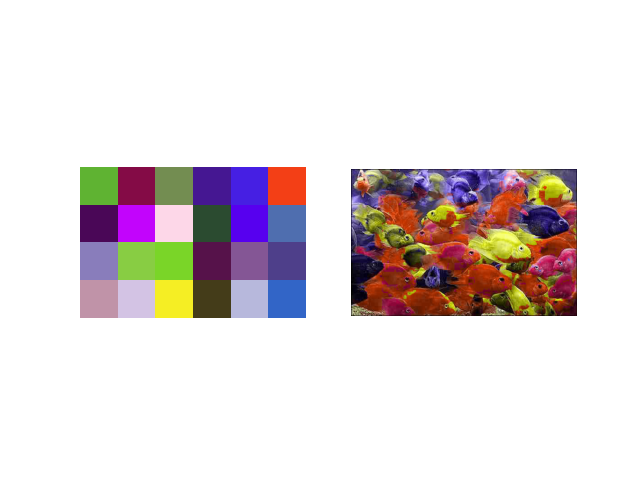

In [30]:
fig, axs = plt.subplots(1, 2)

axs[0].axis("off")
axs[0].imshow(test_img)

axs[1].axis("off")
axs[1].imshow(quantized_img_rgb)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-quantized-rgb-{k}.png", dpi=200, bbox_inches="tight")

## (b) Quantize in HSV space

Given an RGB image, convert it to HSV and quantize the 1-dimensional Hue space. Map each pixel in the input image to its nearest quantized Hue value, while keeping its Saturation and Value channels the same as the input. Convert the quantized output back to RGB color space.

Use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to perfom the k-means clustering. See the documentation for details on how to use the class, and make sure you set `random_state=101`.

Use the [skimage.color.rgb2hsv](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv) and [skimage.color.hsv2rgb](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.hsv2rgb) functions to convert the image to HSV and back to RGB.

In [51]:
#export
def quantize_hsv(img: np.ndarray, k: int) -> np.ndarray:
    """
    Compute the k-means clusters for the input image in the hue dimension of the
    HSV space. Replace the hue values with the nearest cluster's hue value. Finally,
    convert the image back to RGB.
    
    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        k: The number of clusters to use

    Output:
        An RGB image#     img_rgb = np.copy(img)
#     img_hsv = rgb2hsv(img_rgb)

#     w, h, d = np.shape(img_hsv)
#     image_array = np.reshape(img_hsv, (w * h, d))

#     hue_array = image_array[:, 0]
#     kmeans = KMeans(n_clusters=k)

#     # Get labels for all points
#     labels = kmeans.fit_predict(hue_array.reshape(-1, 1))

#     means = kmeans.cluster_centers_
#     image_out = np.zeros((w, h, d))
#     label_idx = 0
#     for i in range(w):
#         for j in range(h):
#             hue = means[labels[label_idx]]
#             image_out[i][j] = [hue, img_hsv[i, j, 1], img_hsv[i, j, 2]]
#             label_idx += 1
#     image_out = hsv2rgb(image_out) * 255
#     image_out = np.array(image_out, dtype='uint8')
#     return image_out with shape H x W x 3 and dtype "uint8"
    """
    img_rgb = np.copy(img)
    img_hsv = rgb2hsv(img_rgb)
    hue_array = img_hsv[:,:,0]
    samples = hue_array.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k, random_state=101)
    labels = kmeans.fit_predict(samples)
    centers = kmeans.cluster_centers_
    img_hsv[:,:,0] = centers[labels].reshape(hue_array.shape)
    quantized_img = (hsv2rgb(img_hsv) * 255).astype(np.uint8)
    return quantized_img
    ##########################################################################
    # TODO: Convert the image to HSV. Perform k-means clustering in hue      #
    # space. Replace the hue values in the image with the cluster centers.   #
    # Convert the image back to RGB.                                         #
    ##########################################################################

    

    ##########################################################################
    ##########################################################################

In [54]:
expected_quantized_img_hsv = np.array([[[ 94, 179,  49],
        [131,  11, 112],
        [101, 141,  81],
        [ 38,  23, 146],
        [ 55,  31, 227],
        [243, 166,  22]],

       [[ 87,   7,  74],
        [252,   3, 212],
        [253, 215, 246],
        [ 54,  75,  43],
        [ 29,   0, 239],
        [ 90,  79, 175]],

       [[132, 125, 187],
        [114, 205,  66],
        [ 99, 213,  40],
        [ 86,  17,  75],
        [149,  86, 139],
        [ 72,  63, 138]],

       [[192, 147, 184],
        [199, 195, 227],
        [245, 172,  36],
        [ 68,  53,  24],
        [187, 183, 220],
        [ 68,  49, 199]]], dtype=np.uint8)

quantized_img_hsv = quantize_hsv(test_img, test_k)

if np.allclose(quantized_img_hsv, expected_quantized_img_hsv):
    print("\nQuantized image computed correctly!")
else:
    print("\nQuantized image is incorrect.")
    print(f"\nexpected:\n\n{expected_quantized_img_hsv}")
    print(f"\ncomputed:\n\n{quantized_img_hsv}")


Quantized image computed correctly!


In [53]:
img = plt.imread("fish.jpg")

quantized_img_hsv = quantize_hsv(img, test_k)
plt.imshow(quantized_img_hsv)
plt.show()

Let's take a look at the results.

<IPython.core.display.Javascript object>


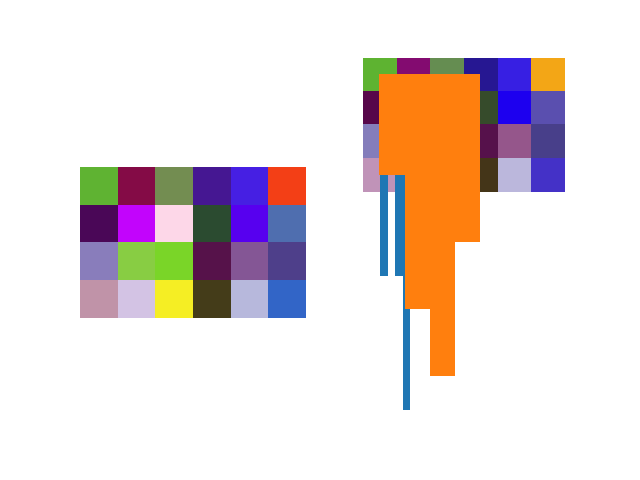

In [55]:
fig, axs = plt.subplots(1, 2)

axs[0].axis("off")
axs[0].imshow(test_img)

axs[1].axis("off")
axs[1].imshow(quantized_img_hsv)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-quantized-hsv-{k}.png", dpi=200, bbox_inches="tight")

## (c) Sum of squared error

Write a function to compute the SSD error (sum of squared error) between the original RGB pixel values and the quantized values

In [56]:
#export
def compute_quantization_error(img: np.ndarray, quantized_img: np.ndarray) -> int:
    """
    Compute the sum of squared error between the two input images.

    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        quantized_img: Quantized RGB image with shape H x W x 3 and dtype "uint8"

    Output:
    
    """
    ##########################################################################
    # TODO: Compute the sum of squared error.                                #
    ##########################################################################

    

    ##########################################################################
    ##########################################################################
    error = np.square(img.astype('float32') - quantized_img.astype('float32'))
    return np.sum(error)

In [57]:
error_rgb = compute_quantization_error(test_img, quantized_img_rgb)
print(f"quantization error (rgb): {error_rgb:,}")

error_hsv = compute_quantization_error(test_img, quantized_img_hsv)
print(f"quantization error (hsv): {error_hsv:,}")

quantization error (rgb): 112,251.0
quantization error (hsv): 33,167.0


In [58]:
if error_rgb == 112251:
    print("\nQuantization error computed correctly!")
else:
    print("\nQuantization error incorrect")
    print(f"\nexpected: 112,251\ncomputed: {error_rgb}")


if error_hsv == 33167:
    print("\nQuantization error computed correctly!")
else:
    print("\nQuantization error incorrect")
    print(f"\nexpected: 33,167\ncomputed: {error_hsv}")


Quantization error computed correctly!

Quantization error computed correctly!


## (d) Calculate Hue histograms

Given an image, compute and display two histograms of its hue values. Let the first histogram use equally-spaced bins (uniformly dividing up the hue values), and let the second histogram use bins defined by the `k` cluster center memberships (i.e., all pixels belonging to hue cluster `i` go to the `i-th` bin, for `i=1,...k`).

In [59]:
#export
def get_hue_histograms(img: np.ndarray, k: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute the histogram values two ways: equally spaced and clustered.
    
    Inputs:
        img: Input RGB image with shape H x W x 3 and dtype "uint8"
        k: The number of clusters to use

    Output:
        hist_equal: The values for an equally spaced histogram
        hist_clustered: The values for a histogram of the cluster assignments
    """
#     hist_equal = np.zeros((k,), dtype=np.int64)
#     hist_clustered = np.zeros((k,), dtype=np.int64)
    hues = rgb2hsv(img)[:, :, 0]
    hues = np.ravel(hues)
    hist_equal = plt.hist(hues, bins=k)


    kmeans = KMeans(n_clusters=k,random_state=101)
    labels = kmeans.fit_predict(hues.reshape(-1,1))
    hist_clustered = plt.hist(labels, bins=k)


    ##########################################################################
    # TODO: Convert the image to HSV. Calculate a k-bin histogram for the    #
    # hue dimension. Calculate the k-means clustering of the hue space.      #
    # Calculate the histogram values for the cluster assignments.            #
    ##########################################################################

    

    ##########################################################################
    ##########################################################################
    
    return hist_equal[0], hist_clustered[0]

In [60]:
expected_hist_equal = np.array([ 6,  2,  6, 10], dtype=np.int64)
expected_hist_clustered = np.array([3, 7, 9, 5], dtype=np.int64)

hist_equal, hist_clustered = get_hue_histograms(test_img, test_k)

if np.all(hist_equal == expected_hist_equal):
    print("\nEqual histogram values computed correctly!")
else:
    print("\nEqual histogram values are incorrect.")
    print(f"\nexpected: {expected_hist_equal}")
    print(f"\ncomputed: {hist_equal}")
    
if np.all(hist_clustered == expected_hist_clustered):
    print("\nClustered histogram values computed correctly!")
else:
    print("\nClustered histogram values are incorrect.")
    print(f"\nexpected: {expected_hist_clustered}")
    print(f"\ncomputed: {hist_clustered}")


Equal histogram values computed correctly!

Clustered histogram values computed correctly!


Let's take a look at the results.

<IPython.core.display.Javascript object>


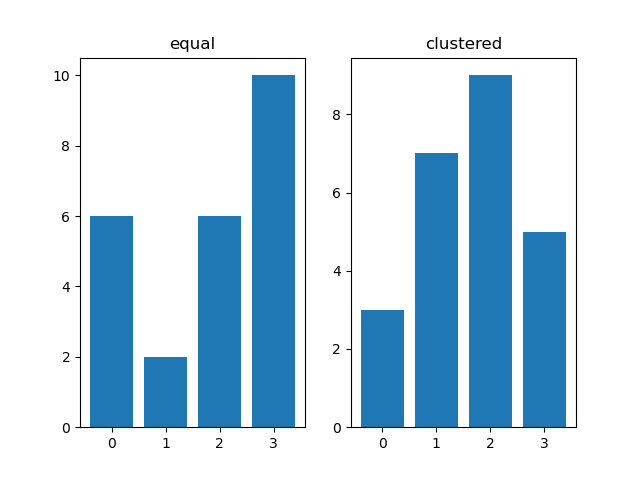

<BarContainer object of 4 artists>

In [61]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("equal")
axs[0].bar(np.arange(test_k), hist_equal)

axs[1].set_title("clustered")
axs[1].bar(np.arange(test_k), hist_clustered)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-histograms-{k}.png", dpi=200, bbox_inches="tight")

In [62]:
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
import skimage.color as color
from sklearn.cluster import MeanShift

def binReduction(im, votes, radius):
    w, h = np.shape(votes)

    out = np.zeros(shape=(w,h))

    for i in range(0, w, 10):
        for j in range(0, h, 10):
            try:
                subMatrix = votes[i-5:i+5, j-5:j+5]
                out[i,j] = np.sum(subMatrix)
            except:
                pass
    plt.title('Bin Reduction')
    plt.imshow(out)
    plt.show()

    # FIND AND DRAW CIRCLES
    centers = list()
    for i in range(w):
        for j in range(h):
            if out[i, j] >= 50:
                    centers.append((j, i))


    drawCircles(im, centers, radius)

def detectCircles(im, radius, useGradient, sig=2):
    img = color.rgb2gray(im)
    w, h = np.shape(img)

    edges = feature.canny(img, sigma=sig)
    ds = np.gradient(img)
    gradients = np.arctan2(-ds[1], ds[0])

    votes = np.zeros(shape=(w, h))
    for i in range(w):
        for j in range(h):
            if edges[i, j]:
                if useGradient:
                    theta = gradients[i, j]
                    theta2 = theta + np.pi
                    a = i - radius * np.cos(-theta)
                    b = j - radius * np.sin(-theta)
                    aInv = i - radius * np.cos(theta2)
                    bInv = j - radius * np.sin(theta2)
                    try:
                        votes[int(a), int(b)] += 1
                        votes[int(aInv), int(bInv)] += 1

                    except:
                        pass

                else:
                    for theta in np.radians(range(360)):
                        a = i - radius * np.cos(theta)
                        b = j - radius * np.sin(theta)
                        try:
                            votes[int(a), int(b)] += 1
                        except:
                            pass

    # MEAN SHIFT EXPERIMENTATION
    ######################################
    # points = list()
    # for i in range(w):
    #     for j in range(h):
    #         points = points + [(i, j)] * int(votes[i, j])
    # meanShift = MeanShift()
    # meanShift.fit(points)
    # modes = meanShift.cluster_centers_
    # print('num circles: ' + str(len(modes)))
    # drawCircles(im, modes, radius)
    #######################################

    # BIN REDUCTION
    ########################
    binReduction(im, votes, radius)

    plt.title("Accumulator Array")
    plt.imshow(votes)
    plt.show()

    # find centers
    centers = list()
    for i in range(w):
        for j in range(h):
            if useGradient:
                if votes[i, j] >= 7:
                    centers.append((j, i))
            else:
                if votes[i, j] >= 200:
                    centers.append((j, i))

    if not centers:
        ind = np.unravel_index(votes.argmax(), votes.shape)
        print ind
        centers.append((ind[1], ind[0]))
    drawCircles(im, centers, radius)
    return centers


def drawCircles(im, centers, r):
    img = np.copy(im)
    for c in centers:
        for theta in np.radians(range(360)):
            a = c[0] - r * np.cos(theta)
            b = c[1] - r * np.sin(theta)
            try:
                img[int(b), int(a)] = [255, 0, 0]
            except:
                pass

    plt.title("Output: r=" + str(r))
    plt.imshow(img)
    plt.show()


# Main method / answer sheet figs
egg = plt.imread("egg.jpg")
jup = plt.imread("jupiter.jpg")

# eggCentersGradient = detectCircles(egg, 8, True)
eggCenters = detectCircles(egg, 8, False)

jupCentersGradient = detectCircles(jup, 95, True, sig=6)
jupCenters = detectCircles(jup, 89, False, sig=5)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(ind)? (<ipython-input-62-3f922fd7b878>, line 102)

## Submission

Once you are ready to submit, you can run the following cell to export this notebook into a Python script. You should submit this script to Gradescope.

In [63]:
!python notebook2script.py

Converted ps2_updated.ipynb to submissionKMeans.py
